In [61]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [62]:
class G:
  def __init__(self, r=0, i=0):
    self.re = r
    self.im = i

  def __add__(self, x):
    return G(self.re + x.re, self.im + x.im)

  def __sub__(self, x):
    return G(self.re - x.re, self.im - x.im)

  def __mul__(self, x):
    a = self.re
    b = self.im
    c = x.re
    d = x.im
    return G(a*c - b*d, a*d + b*c + b*d)

  def __str__(self):
    return str(self.re) + " + " + str(self.im) + "ω"

  def __repr__(self):
    return str(self)

  def coords(self):
    return self.re, self.im

  def norm(self):
    a = self.re
    b = self.im
    return a**2 + a*b + b**2

  def conjugate(self):
    return G(self.re + self.im, -self.im)

  def __truediv__(self, x):
    if x.norm() == 0:
      raise Exception("Division by zero")
    int_num = self * x.conjugate() # numerator of the complex quotient a / b
    a, b = int_num.coords()
    int_den = x.norm() # denominator of the complex quotient a / b
    a, b = a / int_den, b / int_den # components of the complex quotient a / b

    return G(a, b)

  def real(self):
    return self.re

  def imaginary(self):
    return self.im


In [63]:
def gauss_gcd_step(a, b):
  x, y = (a / b).coords()

  # u = x - (1 / math.sqrt(3)) * y
  # v = (2 / math.sqrt(3)) * y

  u, v = x, y

  qx, qy = math.floor(u + 0.5), math.floor(v + 0.5)

  q = G(qx, qy)

  r = a - q * b

  return q, r

In [64]:
# def gauss_gcd(a, b):
#   q, r = gauss_gcd_step(a, b)
#   steps = 1
#   while abs(r.norm()) > 0:
#     a, b = b, r
#     q, r = gauss_gcd_step(a, b)
#     steps += 1
#   return b, steps

In [65]:
def gauss_gcd(a, b):
  q, r = gauss_gcd_step(a, b)
  q1 = r
  steps = 1
  while r.norm() > 0:
    a, b = b, r
    q, r = gauss_gcd_step(a, b)
    steps += 1
    # if steps == 1:
    #   q1 = r
  return b, steps, q1

In [66]:
a = G(119, 120)
# 73 and 41
# 119 120

grid_size = 400

dividends = [G(x, y) for x in range(-grid_size, grid_size) for y in range(-grid_size, grid_size)]


In [67]:
steps = []
quots = []
for b in dividends:
  print(b)
  if b.norm() == 0:
    steps.append(1)
    quots.append(0)
    continue
  _, s, q = gauss_gcd(a, b)
  steps.append(s)
  quots.append(q.norm())

Streaming output truncated to the last 5000 lines.
393 + 200ω
393 + 201ω
393 + 202ω
393 + 203ω
393 + 204ω
393 + 205ω
393 + 206ω
393 + 207ω
393 + 208ω
393 + 209ω
393 + 210ω
393 + 211ω
393 + 212ω
393 + 213ω
393 + 214ω
393 + 215ω
393 + 216ω
393 + 217ω
393 + 218ω
393 + 219ω
393 + 220ω
393 + 221ω
393 + 222ω
393 + 223ω
393 + 224ω
393 + 225ω
393 + 226ω
393 + 227ω
393 + 228ω
393 + 229ω
393 + 230ω
393 + 231ω
393 + 232ω
393 + 233ω
393 + 234ω
393 + 235ω
393 + 236ω
393 + 237ω
393 + 238ω
393 + 239ω
393 + 240ω
393 + 241ω
393 + 242ω
393 + 243ω
393 + 244ω
393 + 245ω
393 + 246ω
393 + 247ω
393 + 248ω
393 + 249ω
393 + 250ω
393 + 251ω
393 + 252ω
393 + 253ω
393 + 254ω
393 + 255ω
393 + 256ω
393 + 257ω
393 + 258ω
393 + 259ω
393 + 260ω
393 + 261ω
393 + 262ω
393 + 263ω
393 + 264ω
393 + 265ω
393 + 266ω
393 + 267ω
393 + 268ω
393 + 269ω
393 + 270ω
393 + 271ω
393 + 272ω
393 + 273ω
393 + 274ω
393 + 275ω
393 + 276ω
393 + 277ω
393 + 278ω
393 + 279ω
393 + 280ω
393 + 281ω
393 + 282ω
393 + 283ω
393 + 284ω
393 + 285ω
393

In [68]:
def embed(x, y):
  return x + 0.5 * y, (np.sqrt(3) / 2) * y

In [79]:
xhex, yhex = [], []

for z in dividends:
    x, y = z.coords()
    X, Y = embed(x, y)
    xhex.append(X)
    yhex.append(Y)

In [80]:
assocs = [a, a * G(-1, 0), a * G(0,1), a * G(0,-1), a * G(-1, 1), a * G(1, -1)]

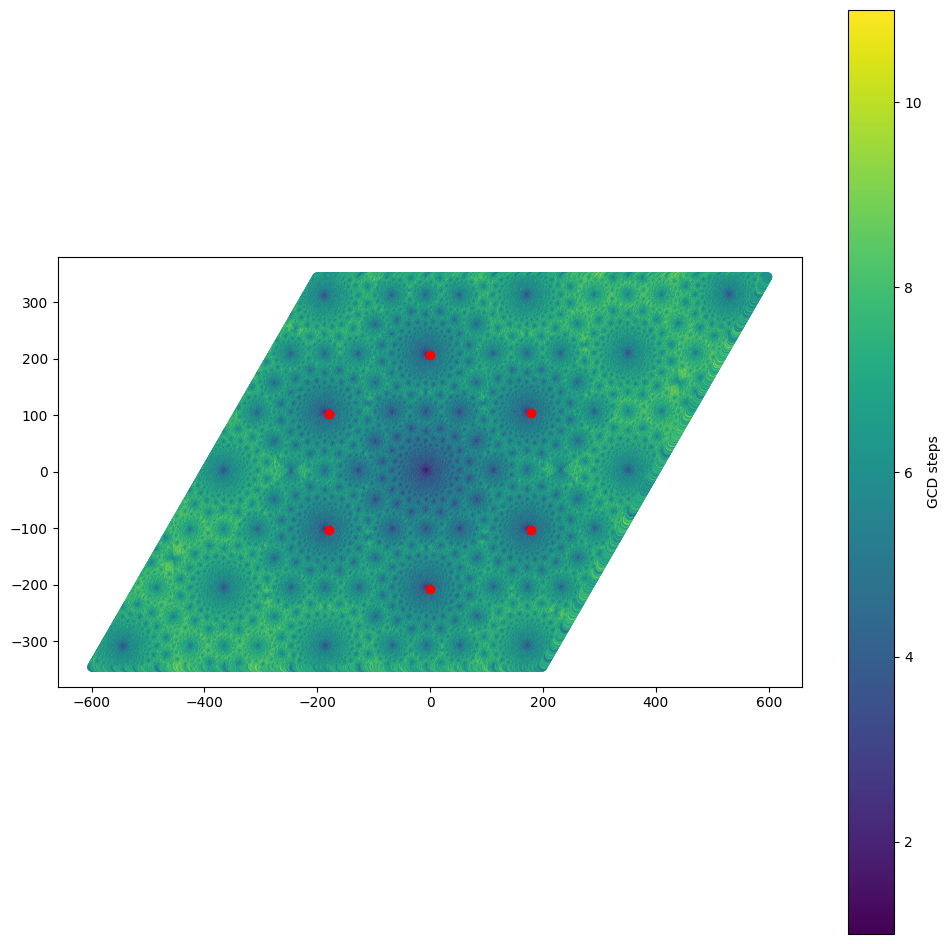

In [81]:
fig, ax = plt.subplots(figsize=(12, 12))

x, y = np.array(range(-grid_size, grid_size)), np.array(range(-grid_size, grid_size))
x, y = embed(x, y)
X, Y = np.meshgrid(x, y)

cf = plt.scatter(
    xhex,
    yhex,
    c=steps,
    cmap='viridis',
    s=30,
    vmin=vmin,
    vmax=vmax
)

plt.gca().set_aspect('equal')

for assoc in assocs:
    as_x, as_y = embed(assoc.real(), assoc.imaginary())
    ax.scatter(as_x, as_y, color='red', zorder=5)

plt.gca().set_aspect('equal')

cbar = plt.colorbar(cf)
cbar.set_label("GCD steps")

plt.show()

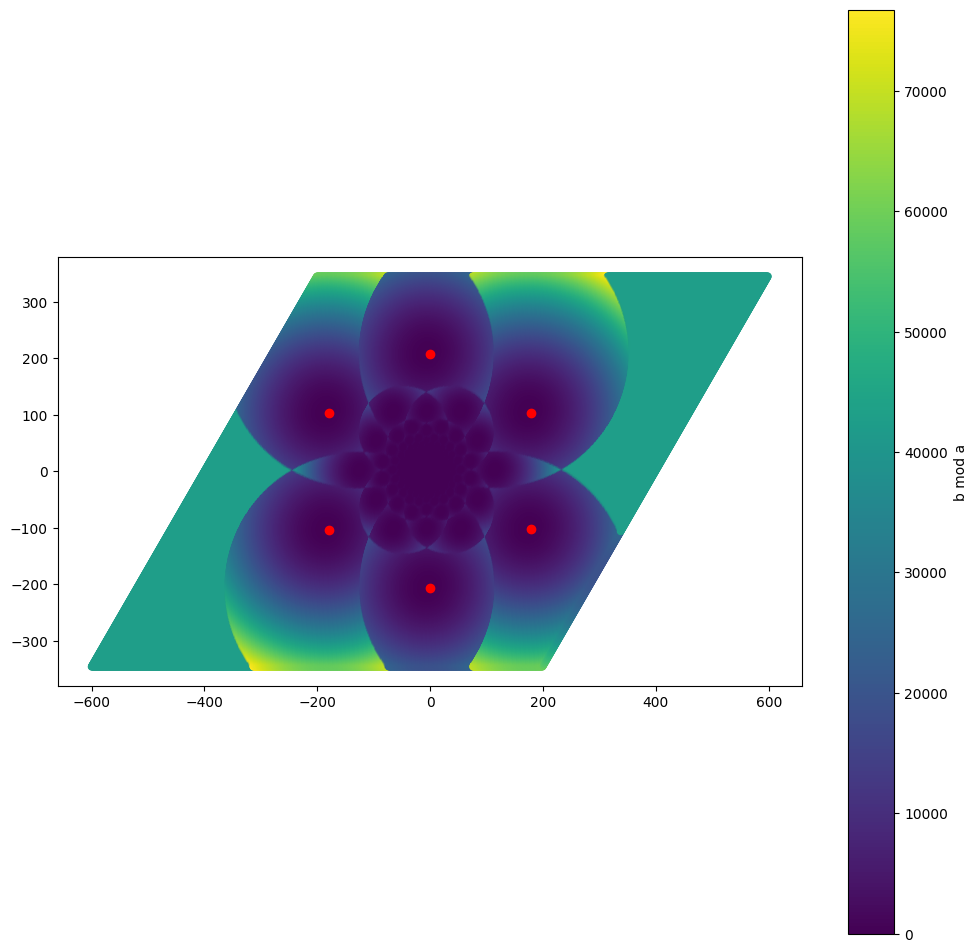

In [85]:
fig, ax = plt.subplots(figsize=(12, 12))

x, y = np.array(range(-grid_size, grid_size)), np.array(range(-grid_size, grid_size))
x, y = embed(x, y)
X, Y = np.meshgrid(x, y)

cf = ax.scatter(
    xhex,
    yhex,
    c=quots,
    cmap='viridis',
    s=20,
)

for assoc in assocs:
    as_x, as_y = embed(assoc.real(), assoc.imaginary())
    ax.scatter(as_x, as_y, color='red', zorder=5)

ax.set_aspect('equal')

cbar = plt.colorbar(cf)
cbar.set_label("b mod a")

plt.show()